In [34]:
import numpy as np
np.set_printoptions(threshold=np.inf)
%matplotlib inline

In [2]:
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [3]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
import json
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]

In [5]:
records[0]['tz']

u'America/New_York'

In [6]:
# find most often occuring timezones in pure python
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [7]:
time_zones

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'',
 u'America/Los_Angeles',
 u'America/New_York',
 u'America/New_York',
 u'America/New_York',
 u'Asia/Hong_Kong',
 u'Asia/Hong_Kong',
 u'America/New_York',
 u'America/Denver',
 u'Europe/Rome',
 u'Africa/Ceuta',
 u'America/New_York',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Madrid',
 u'Asia/Kuala_Lumpur',
 u'Asia/Nicosia',
 u'America/Sao_Paulo',
 u'',
 u'',
 u'Europe/London',
 u'America/New_York',
 u'Pacific/Honolulu',
 u'America/Chicago',
 u'',
 u'',
 u'Pacific/Honolulu',
 u'',
 u'America/New_York',
 u'America/New_York',
 u'America/New_York',
 u'America/Chicago',
 u'Europe/Rome',
 u'America/New_York',
 u'America/New_York',
 u'America/Los_Angeles',
 u'',
 u'',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Malta',
 u'America/New_York',
 u'America/New_York',
 u'',
 u'America/Los_Angeles',
 u'America/Sao_Pa

In [8]:
# iterating
from collections import defaultdict 

def get_counts(sequence):
    counts = defaultdict(int) # values will initialize to 0
    # so cool
    for x in sequence:
        counts[x] += 1
    return counts


In [9]:
counts = get_counts(time_zones)
print counts['America/New_York']

1251


In [10]:
len(time_zones)

3440

In [11]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [12]:
top_counts(counts)

[(33, u'America/Sao_Paulo'),
 (35, u'Europe/Madrid'),
 (36, u'Pacific/Honolulu'),
 (37, u'Asia/Tokyo'),
 (74, u'Europe/London'),
 (191, u'America/Denver'),
 (382, u'America/Los_Angeles'),
 (400, u'America/Chicago'),
 (521, u''),
 (1251, u'America/New_York')]

In [13]:
# easier with counter class
from collections import Counter
counts = Counter(time_zones)

In [14]:
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

##Pandas
**DataFrame** is main Pandas data structure
like a table or spreadsheet

In [15]:
from pandas import DataFrame, Series
import pandas as pd

In [16]:
frame = DataFrame(records)

In [17]:
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1331919941,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1,http://t.co/03elZC4Q,1331923250,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0,direct,1331923249,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1273672411,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923251,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1273672506,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923252,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0,http://plus.url.google.com/url?sa=z&n=13319232...,1331923255,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/,1331923255,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1331923254,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,NaN,0,http://t.co/o1Pd0WeV,1331923255,,http://apod.nasa.gov/apod/ap120312.html


In [18]:
# this will show a summary view
frame['tz']

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                          
8                          
9                          
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                      NaN
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                         
29                         
               ...         
3530    America/Los_Angeles
3531                       
3532       America/New_York
3533       America/New_York
3534        America/

In [19]:
tz_counts = frame['tz'].value_counts()

In [20]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [21]:
# clean missing vals
clean_tz = frame['tz'].fillna('Missing')
clean_tz

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                          
8                          
9                          
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                  Missing
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                         
29                         
               ...         
3530    America/Los_Angeles
3531                       
3532       America/New_York
3533       America/New_York
3534        America/

In [22]:
# WHAT??
clean_tz[clean_tz == ''] = 'Unknown'
clean_tz

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                   Unknown
8                   Unknown
9                   Unknown
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                  Missing
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                  Unknown
29                  Unknown
               ...         
3530    America/Los_Angeles
3531                Unknown
3532       America/New_York
3533       America/New_York
3534        America/

In [23]:
tz_counts = clean_tz.value_counts()

In [24]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

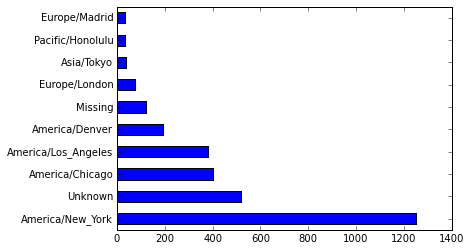

In [35]:
tz_counts[:10].plot(kind='barh',rot=0)

In [36]:
frame['a'][1]

u'GoogleMaps/RochesterNY'

In [37]:
frame['a'][50]

u'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [38]:
# hm, let's get the browser info from these 'agent' values
results = Series([x.split()[0] for x in frame.a.dropna()])

In [39]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [40]:
results.value_counts()

Mozilla/5.0                                          2594
Mozilla/4.0                                           601
GoogleMaps/RochesterNY                                121
Opera/9.80                                             34
TEST_INTERNET_AGENT                                    24
GoogleProducer                                         21
Mozilla/6.0                                             5
BlackBerry8520/5.0.0.681                                4
Dalvik/1.4.0                                            3
BlackBerry8520/5.0.0.592                                3
Goldfire                                                2
Socialite/7766                                          2
BlackBerry9630/5.0.0.975                                2
Acoon                                                   2
BlackBerry9530/5.0.0.328                                1
Opera/9.64(Windows                                      1
LG-GW382f/V10d                                          1
BlackBerry9700

In [41]:
cframe = frame[frame.a.notnull()]
cframe[:10]

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1331919941,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1,http://t.co/03elZC4Q,1331923250,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0,direct,1331923249,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1273672411,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923251,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1273672506,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923252,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0,http://plus.url.google.com/url?sa=z&n=13319232...,1331923255,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/,1331923255,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1331923254,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,NaN,0,http://t.co/o1Pd0WeV,1331923255,,http://apod.nasa.gov/apod/ap120312.html


In [42]:
operating_system = np.where(cframe['a'].str.contains('Windows'),
                           'Windows', 'Not Windows')

In [50]:
print operating_system[:5]

['Windows' 'Not Windows' 'Windows' 'Not Windows' 'Windows']


In [51]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [53]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [55]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245,276
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,0,2
Africa/Johannesburg,0,1
Africa/Lusaka,0,1
America/Anchorage,4,1
America/Argentina/Buenos_Aires,1,0
America/Argentina/Cordoba,0,1


In [56]:
indexer = agg_counts.sum(1).argsort()

In [57]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [58]:
count_subset = agg_counts.take(indexer)[-10:]

In [59]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13,20
Europe/Madrid,16,19
Pacific/Honolulu,0,36
Asia/Tokyo,2,35
Europe/London,43,31
America/Denver,132,59
America/Los_Angeles,130,252
America/Chicago,115,285
,245,276


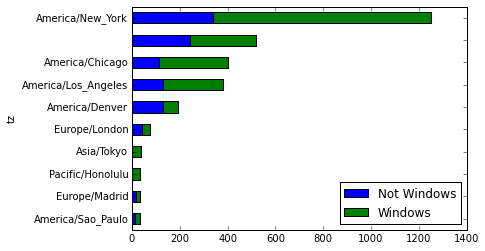

In [60]:
count_subset.plot(kind='barh', stacked=True)

In [61]:
# make it easy to compare percentages
normed_subset = count_subset.div(count_subset.sum(1), axis=0)

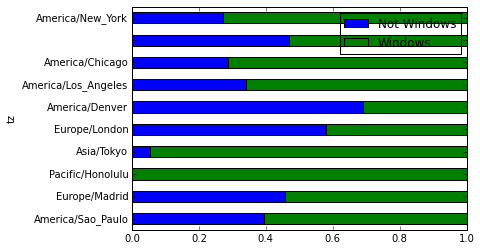

In [62]:
normed_subset.plot(kind='barh', stacked=True)